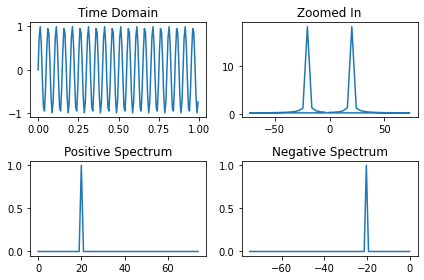

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

Fs = 150 
t= np.arange(0,1,1/Fs)
f = 20 # Hz

x = np.sin(2*np.pi*20*t)#+0.5*np.sin(2*np.pi*40*t)+1.5*np.sin(2*np.pi*5*t)

t = np.arange(0,1,1/Fs)
t_zoomed= np.arange(0,0.5,1/Fs)

n = np.size(t)
n_zoomed = np.size(t_zoomed)


fr_positive = (Fs/2)*np.linspace(0,1,n//2)
fr_negative =(Fs/2)*np.linspace(0,-1,n//2)

fft_fr = syfp.fftfreq(len(x[0:37]),1/Fs)

#compute FFT
x_fft =fft(x)
x_m = (2/n)* abs(x_fft[0:np.size(fr_positive)])

x_fft_zoomed =fft(x[0:37])


fig, axs = plt.subplots(2,2)

axs[0][0].plot(t,x)
axs[0][0].set_title('Time Domain')

axs[0][1].plot(fft_fr,np.abs(x_fft_zoomed))
axs[0][1].set_title('Zoomed In')


axs[1][0].plot(x_m)
axs[1][0].set_title('Positive Spectrum')

axs[1][1].plot(fr_negative,x_m)
axs[1][1].set_title('Negative Spectrum')


plt.tight_layout()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

Fs = 20000
t= np.arange(0,1,1/Fs)


x_20 = np.sin(2*np.pi*20*t)
x_80 = np.sin(2*np.pi*80*t)
x_150= np.sin(2*np.pi*150*t)
x_200= np.sin(2*np.pi*200*t)


#x_20_dataset = np.array[[0,0,0,0,0,0,0,0,0,0]]

#x_20_dataset=np.empty((200,10), dtype=float, order='C')


x_20_dataset = x_20[0:10]
x_80_dataset = x_80[0:10]
x_150_dataset = x_150[0:10]
x_200_dataset = x_200[0:10]



for i in range(int(Fs/10)-1):
    start = int((i+1)*10)
    end = int(start+10)
    xx_20=x_20[start:end]
    x_20_dataset=np.vstack((x_20_dataset,xx_20))
    
    xx_80=x_80[start:end]
    x_80_dataset=np.vstack((x_80_dataset,xx_80))
    
    xx_150=x_150[start:end]
    
    
Label_xx_20 = np.array([0])
xx_20_dataset_concatenate = np.tile(Label_xx_20[np.newaxis,:],(x_20_dataset.shape[0],1))
xx_20_entire_dataset=np.concatenate((x_20_dataset,xx_20_dataset_concatenate),axis=1)


Label_xx_80 = np.array([1])
xx_80_dataset_concatenate = np.tile(Label_xx_80[np.newaxis,:],(x_80_dataset.shape[0],1))
xx_80_entire_dataset=np.concatenate((x_80_dataset,xx_80_dataset_concatenate),axis=1)


In [3]:
print(xx_80_entire_dataset.shape)

(2000, 11)


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing

Entire_dataset_stacked = np.vstack((xx_20_entire_dataset,xx_80_entire_dataset))

Entire_dataset = preprocessing.StandardScaler().fit_transform(Entire_dataset_stacked)

In [6]:
np.random.shuffle(Entire_dataset)

print(Entire_dataset)

[[ 4.11357828e-14  4.44215215e-02  8.87992043e-02 ...  3.51700611e-01
   3.94553006e-01  1.00000000e+00]
 [-4.37016024e-01 -4.79047761e-01 -5.20606735e-01 ... -7.57773521e-01
  -7.94905936e-01  1.00000000e+00]
 [ 1.77247959e-01  1.86060101e-01  1.94864898e-01 ...  2.47519984e-01
   2.56263649e-01 -1.00000000e+00]
 ...
 [-1.77247959e-01 -1.86060101e-01 -1.94864898e-01 ... -2.47519984e-01
  -2.56263649e-01 -1.00000000e+00]
 [ 5.20606735e-01  5.28858181e-01  5.37088748e-01 ...  5.86015567e-01
   5.94090934e-01 -1.00000000e+00]
 [-1.19406000e+00 -1.18927523e+00 -1.18444351e+00 ... -1.15447804e+00
  -1.14932311e+00 -1.00000000e+00]]


In [7]:
TrainingSet_index = int(0.7*Entire_dataset.shape[0]) #280
Validation_index = int(0.2*Entire_dataset.shape[0])#80
Test_index = int(Entire_dataset.shape[0] - (TrainingSet_index + Validation_index)) #40

In [8]:
print(TrainingSet_index)
print(Validation_index)
print(Test_index)

2800
800
400


In [9]:
Training_set = Entire_dataset[0:TrainingSet_index]
Validation_set = Entire_dataset[TrainingSet_index:Validation_index+TrainingSet_index]
Test_set = Entire_dataset[Validation_index+TrainingSet_index:]


In [10]:
X_Trained = Training_set[:,0:10]
Y_Trained = Training_set[:,10:11]

X_Validation = Validation_set[:,0:10]
Y_Validation = Validation_set[:,10:]

X_Test = Test_set[:,0:10]
Y_TrueClassification = Test_set[:,10:]

In [11]:
print(Y_Validation)

[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(32, input_shape=((10,1)), activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 32)            4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(X_Trained.shape)

(2800, 10)


In [14]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

X_Trained=X_Trained.reshape(2800,10,1)

model.fit(X_Trained,
          Y_Trained,
          batch_size=10,
          epochs=100)

Epoch 1/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 2/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 3/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 4/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 5/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 6/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 7/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 8/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 9/100
280/280 [==============================] - 2s 7ms/step - loss: 15.1948 - accuracy: 0.5018
Epoch 10/100
280/280 [==============================] - 2s 8ms/step - loss: 15.194

In [175]:
X_Test = Test_set[:,0:10]

In [197]:
X_30=x_20[1000:1010]
print(X_30.shape)

(10,)


In [198]:
X_30=X_30.reshape(1,10,1)

In [199]:
model.predict(X_30)

array([[1.]], dtype=float32)

# Using Sliding Window

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

Fs = 20000
t= np.arange(0,1,1/Fs)


x_20 = np.sin(2*np.pi*20*t)
x_80 = np.sin(2*np.pi*80*t)
x_150= np.sin(2*np.pi*150*t)
x_200= np.sin(2*np.pi*200*t)


#x_20_dataset = np.array[[0,0,0,0,0,0,0,0,0,0]]

#x_20_dataset=np.empty((200,10), dtype=float, order='C')


x_20_dataset = x_20[0:10]
x_80_dataset = x_80[0:10]
x_150_dataset = x_150[0:10]
x_200_dataset = x_200[0:10]


In [2]:
window_sliding = 10
size_of_window = len(x_20)-int(window_sliding)

In [3]:
window_sliding = 10
x_20_data_sliding = x_20[0:10]
x_80_data_sliding = x_80[0:10]
x_150_data_sliding = x_150[0:10]
x_200_data_sliding = x_200[0:10]


for i in range(1,size_of_window):
    start_sliding = i
    end_sliding = i + 10
    print(str(start_sliding)+' '+str(end_sliding))
    x_20_data_sliding=np.vstack((x_20_data_sliding,x_20[start_sliding:end_sliding]))
    x_80_data_sliding=np.vstack((x_80_data_sliding,x_80[start_sliding:end_sliding]))
    x_150_data_sliding=np.vstack((x_150_data_sliding,x_150[start_sliding:end_sliding]))
    x_200_data_sliding=np.vstack((x_200_data_sliding,x_200[start_sliding:end_sliding]))
    

1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
10 20
11 21
12 22
13 23
14 24
15 25
16 26
17 27
18 28
19 29
20 30
21 31
22 32
23 33
24 34
25 35
26 36
27 37
28 38
29 39
30 40
31 41
32 42
33 43
34 44
35 45
36 46
37 47
38 48
39 49
40 50
41 51
42 52
43 53
44 54
45 55
46 56
47 57
48 58
49 59
50 60
51 61
52 62
53 63
54 64
55 65
56 66
57 67
58 68
59 69
60 70
61 71
62 72
63 73
64 74
65 75
66 76
67 77
68 78
69 79
70 80
71 81
72 82
73 83
74 84
75 85
76 86
77 87
78 88
79 89
80 90
81 91
82 92
83 93
84 94
85 95
86 96
87 97
88 98
89 99
90 100
91 101
92 102
93 103
94 104
95 105
96 106
97 107
98 108
99 109
100 110
101 111
102 112
103 113
104 114
105 115
106 116
107 117
108 118
109 119
110 120
111 121
112 122
113 123
114 124
115 125
116 126
117 127
118 128
119 129
120 130
121 131
122 132
123 133
124 134
125 135
126 136
127 137
128 138
129 139
130 140
131 141
132 142
133 143
134 144
135 145
136 146
137 147
138 148
139 149
140 150
141 151
142 152
143 153
144 154
145 155
146 156
147 157
148 158
149 159
150 1

1527 1537
1528 1538
1529 1539
1530 1540
1531 1541
1532 1542
1533 1543
1534 1544
1535 1545
1536 1546
1537 1547
1538 1548
1539 1549
1540 1550
1541 1551
1542 1552
1543 1553
1544 1554
1545 1555
1546 1556
1547 1557
1548 1558
1549 1559
1550 1560
1551 1561
1552 1562
1553 1563
1554 1564
1555 1565
1556 1566
1557 1567
1558 1568
1559 1569
1560 1570
1561 1571
1562 1572
1563 1573
1564 1574
1565 1575
1566 1576
1567 1577
1568 1578
1569 1579
1570 1580
1571 1581
1572 1582
1573 1583
1574 1584
1575 1585
1576 1586
1577 1587
1578 1588
1579 1589
1580 1590
1581 1591
1582 1592
1583 1593
1584 1594
1585 1595
1586 1596
1587 1597
1588 1598
1589 1599
1590 1600
1591 1601
1592 1602
1593 1603
1594 1604
1595 1605
1596 1606
1597 1607
1598 1608
1599 1609
1600 1610
1601 1611
1602 1612
1603 1613
1604 1614
1605 1615
1606 1616
1607 1617
1608 1618
1609 1619
1610 1620
1611 1621
1612 1622
1613 1623
1614 1624
1615 1625
1616 1626
1617 1627
1618 1628
1619 1629
1620 1630
1621 1631
1622 1632
1623 1633
1624 1634
1625 1635
1626 1636


2864 2874
2865 2875
2866 2876
2867 2877
2868 2878
2869 2879
2870 2880
2871 2881
2872 2882
2873 2883
2874 2884
2875 2885
2876 2886
2877 2887
2878 2888
2879 2889
2880 2890
2881 2891
2882 2892
2883 2893
2884 2894
2885 2895
2886 2896
2887 2897
2888 2898
2889 2899
2890 2900
2891 2901
2892 2902
2893 2903
2894 2904
2895 2905
2896 2906
2897 2907
2898 2908
2899 2909
2900 2910
2901 2911
2902 2912
2903 2913
2904 2914
2905 2915
2906 2916
2907 2917
2908 2918
2909 2919
2910 2920
2911 2921
2912 2922
2913 2923
2914 2924
2915 2925
2916 2926
2917 2927
2918 2928
2919 2929
2920 2930
2921 2931
2922 2932
2923 2933
2924 2934
2925 2935
2926 2936
2927 2937
2928 2938
2929 2939
2930 2940
2931 2941
2932 2942
2933 2943
2934 2944
2935 2945
2936 2946
2937 2947
2938 2948
2939 2949
2940 2950
2941 2951
2942 2952
2943 2953
2944 2954
2945 2955
2946 2956
2947 2957
2948 2958
2949 2959
2950 2960
2951 2961
2952 2962
2953 2963
2954 2964
2955 2965
2956 2966
2957 2967
2958 2968
2959 2969
2960 2970
2961 2971
2962 2972
2963 2973


4189 4199
4190 4200
4191 4201
4192 4202
4193 4203
4194 4204
4195 4205
4196 4206
4197 4207
4198 4208
4199 4209
4200 4210
4201 4211
4202 4212
4203 4213
4204 4214
4205 4215
4206 4216
4207 4217
4208 4218
4209 4219
4210 4220
4211 4221
4212 4222
4213 4223
4214 4224
4215 4225
4216 4226
4217 4227
4218 4228
4219 4229
4220 4230
4221 4231
4222 4232
4223 4233
4224 4234
4225 4235
4226 4236
4227 4237
4228 4238
4229 4239
4230 4240
4231 4241
4232 4242
4233 4243
4234 4244
4235 4245
4236 4246
4237 4247
4238 4248
4239 4249
4240 4250
4241 4251
4242 4252
4243 4253
4244 4254
4245 4255
4246 4256
4247 4257
4248 4258
4249 4259
4250 4260
4251 4261
4252 4262
4253 4263
4254 4264
4255 4265
4256 4266
4257 4267
4258 4268
4259 4269
4260 4270
4261 4271
4262 4272
4263 4273
4264 4274
4265 4275
4266 4276
4267 4277
4268 4278
4269 4279
4270 4280
4271 4281
4272 4282
4273 4283
4274 4284
4275 4285
4276 4286
4277 4287
4278 4288
4279 4289
4280 4290
4281 4291
4282 4292
4283 4293
4284 4294
4285 4295
4286 4296
4287 4297
4288 4298


5602 5612
5603 5613
5604 5614
5605 5615
5606 5616
5607 5617
5608 5618
5609 5619
5610 5620
5611 5621
5612 5622
5613 5623
5614 5624
5615 5625
5616 5626
5617 5627
5618 5628
5619 5629
5620 5630
5621 5631
5622 5632
5623 5633
5624 5634
5625 5635
5626 5636
5627 5637
5628 5638
5629 5639
5630 5640
5631 5641
5632 5642
5633 5643
5634 5644
5635 5645
5636 5646
5637 5647
5638 5648
5639 5649
5640 5650
5641 5651
5642 5652
5643 5653
5644 5654
5645 5655
5646 5656
5647 5657
5648 5658
5649 5659
5650 5660
5651 5661
5652 5662
5653 5663
5654 5664
5655 5665
5656 5666
5657 5667
5658 5668
5659 5669
5660 5670
5661 5671
5662 5672
5663 5673
5664 5674
5665 5675
5666 5676
5667 5677
5668 5678
5669 5679
5670 5680
5671 5681
5672 5682
5673 5683
5674 5684
5675 5685
5676 5686
5677 5687
5678 5688
5679 5689
5680 5690
5681 5691
5682 5692
5683 5693
5684 5694
5685 5695
5686 5696
5687 5697
5688 5698
5689 5699
5690 5700
5691 5701
5692 5702
5693 5703
5694 5704
5695 5705
5696 5706
5697 5707
5698 5708
5699 5709
5700 5710
5701 5711


6861 6871
6862 6872
6863 6873
6864 6874
6865 6875
6866 6876
6867 6877
6868 6878
6869 6879
6870 6880
6871 6881
6872 6882
6873 6883
6874 6884
6875 6885
6876 6886
6877 6887
6878 6888
6879 6889
6880 6890
6881 6891
6882 6892
6883 6893
6884 6894
6885 6895
6886 6896
6887 6897
6888 6898
6889 6899
6890 6900
6891 6901
6892 6902
6893 6903
6894 6904
6895 6905
6896 6906
6897 6907
6898 6908
6899 6909
6900 6910
6901 6911
6902 6912
6903 6913
6904 6914
6905 6915
6906 6916
6907 6917
6908 6918
6909 6919
6910 6920
6911 6921
6912 6922
6913 6923
6914 6924
6915 6925
6916 6926
6917 6927
6918 6928
6919 6929
6920 6930
6921 6931
6922 6932
6923 6933
6924 6934
6925 6935
6926 6936
6927 6937
6928 6938
6929 6939
6930 6940
6931 6941
6932 6942
6933 6943
6934 6944
6935 6945
6936 6946
6937 6947
6938 6948
6939 6949
6940 6950
6941 6951
6942 6952
6943 6953
6944 6954
6945 6955
6946 6956
6947 6957
6948 6958
6949 6959
6950 6960
6951 6961
6952 6962
6953 6963
6954 6964
6955 6965
6956 6966
6957 6967
6958 6968
6959 6969
6960 6970


8033 8043
8034 8044
8035 8045
8036 8046
8037 8047
8038 8048
8039 8049
8040 8050
8041 8051
8042 8052
8043 8053
8044 8054
8045 8055
8046 8056
8047 8057
8048 8058
8049 8059
8050 8060
8051 8061
8052 8062
8053 8063
8054 8064
8055 8065
8056 8066
8057 8067
8058 8068
8059 8069
8060 8070
8061 8071
8062 8072
8063 8073
8064 8074
8065 8075
8066 8076
8067 8077
8068 8078
8069 8079
8070 8080
8071 8081
8072 8082
8073 8083
8074 8084
8075 8085
8076 8086
8077 8087
8078 8088
8079 8089
8080 8090
8081 8091
8082 8092
8083 8093
8084 8094
8085 8095
8086 8096
8087 8097
8088 8098
8089 8099
8090 8100
8091 8101
8092 8102
8093 8103
8094 8104
8095 8105
8096 8106
8097 8107
8098 8108
8099 8109
8100 8110
8101 8111
8102 8112
8103 8113
8104 8114
8105 8115
8106 8116
8107 8117
8108 8118
8109 8119
8110 8120
8111 8121
8112 8122
8113 8123
8114 8124
8115 8125
8116 8126
8117 8127
8118 8128
8119 8129
8120 8130
8121 8131
8122 8132
8123 8133
8124 8134
8125 8135
8126 8136
8127 8137
8128 8138
8129 8139
8130 8140
8131 8141
8132 8142


9182 9192
9183 9193
9184 9194
9185 9195
9186 9196
9187 9197
9188 9198
9189 9199
9190 9200
9191 9201
9192 9202
9193 9203
9194 9204
9195 9205
9196 9206
9197 9207
9198 9208
9199 9209
9200 9210
9201 9211
9202 9212
9203 9213
9204 9214
9205 9215
9206 9216
9207 9217
9208 9218
9209 9219
9210 9220
9211 9221
9212 9222
9213 9223
9214 9224
9215 9225
9216 9226
9217 9227
9218 9228
9219 9229
9220 9230
9221 9231
9222 9232
9223 9233
9224 9234
9225 9235
9226 9236
9227 9237
9228 9238
9229 9239
9230 9240
9231 9241
9232 9242
9233 9243
9234 9244
9235 9245
9236 9246
9237 9247
9238 9248
9239 9249
9240 9250
9241 9251
9242 9252
9243 9253
9244 9254
9245 9255
9246 9256
9247 9257
9248 9258
9249 9259
9250 9260
9251 9261
9252 9262
9253 9263
9254 9264
9255 9265
9256 9266
9257 9267
9258 9268
9259 9269
9260 9270
9261 9271
9262 9272
9263 9273
9264 9274
9265 9275
9266 9276
9267 9277
9268 9278
9269 9279
9270 9280
9271 9281
9272 9282
9273 9283
9274 9284
9275 9285
9276 9286
9277 9287
9278 9288
9279 9289
9280 9290
9281 9291


10386 10396
10387 10397
10388 10398
10389 10399
10390 10400
10391 10401
10392 10402
10393 10403
10394 10404
10395 10405
10396 10406
10397 10407
10398 10408
10399 10409
10400 10410
10401 10411
10402 10412
10403 10413
10404 10414
10405 10415
10406 10416
10407 10417
10408 10418
10409 10419
10410 10420
10411 10421
10412 10422
10413 10423
10414 10424
10415 10425
10416 10426
10417 10427
10418 10428
10419 10429
10420 10430
10421 10431
10422 10432
10423 10433
10424 10434
10425 10435
10426 10436
10427 10437
10428 10438
10429 10439
10430 10440
10431 10441
10432 10442
10433 10443
10434 10444
10435 10445
10436 10446
10437 10447
10438 10448
10439 10449
10440 10450
10441 10451
10442 10452
10443 10453
10444 10454
10445 10455
10446 10456
10447 10457
10448 10458
10449 10459
10450 10460
10451 10461
10452 10462
10453 10463
10454 10464
10455 10465
10456 10466
10457 10467
10458 10468
10459 10469
10460 10470
10461 10471
10462 10472
10463 10473
10464 10474
10465 10475
10466 10476
10467 10477
10468 10478
1046

11520 11530
11521 11531
11522 11532
11523 11533
11524 11534
11525 11535
11526 11536
11527 11537
11528 11538
11529 11539
11530 11540
11531 11541
11532 11542
11533 11543
11534 11544
11535 11545
11536 11546
11537 11547
11538 11548
11539 11549
11540 11550
11541 11551
11542 11552
11543 11553
11544 11554
11545 11555
11546 11556
11547 11557
11548 11558
11549 11559
11550 11560
11551 11561
11552 11562
11553 11563
11554 11564
11555 11565
11556 11566
11557 11567
11558 11568
11559 11569
11560 11570
11561 11571
11562 11572
11563 11573
11564 11574
11565 11575
11566 11576
11567 11577
11568 11578
11569 11579
11570 11580
11571 11581
11572 11582
11573 11583
11574 11584
11575 11585
11576 11586
11577 11587
11578 11588
11579 11589
11580 11590
11581 11591
11582 11592
11583 11593
11584 11594
11585 11595
11586 11596
11587 11597
11588 11598
11589 11599
11590 11600
11591 11601
11592 11602
11593 11603
11594 11604
11595 11605
11596 11606
11597 11607
11598 11608
11599 11609
11600 11610
11601 11611
11602 11612
1160

12612 12622
12613 12623
12614 12624
12615 12625
12616 12626
12617 12627
12618 12628
12619 12629
12620 12630
12621 12631
12622 12632
12623 12633
12624 12634
12625 12635
12626 12636
12627 12637
12628 12638
12629 12639
12630 12640
12631 12641
12632 12642
12633 12643
12634 12644
12635 12645
12636 12646
12637 12647
12638 12648
12639 12649
12640 12650
12641 12651
12642 12652
12643 12653
12644 12654
12645 12655
12646 12656
12647 12657
12648 12658
12649 12659
12650 12660
12651 12661
12652 12662
12653 12663
12654 12664
12655 12665
12656 12666
12657 12667
12658 12668
12659 12669
12660 12670
12661 12671
12662 12672
12663 12673
12664 12674
12665 12675
12666 12676
12667 12677
12668 12678
12669 12679
12670 12680
12671 12681
12672 12682
12673 12683
12674 12684
12675 12685
12676 12686
12677 12687
12678 12688
12679 12689
12680 12690
12681 12691
12682 12692
12683 12693
12684 12694
12685 12695
12686 12696
12687 12697
12688 12698
12689 12699
12690 12700
12691 12701
12692 12702
12693 12703
12694 12704
1269

13602 13612
13603 13613
13604 13614
13605 13615
13606 13616
13607 13617
13608 13618
13609 13619
13610 13620
13611 13621
13612 13622
13613 13623
13614 13624
13615 13625
13616 13626
13617 13627
13618 13628
13619 13629
13620 13630
13621 13631
13622 13632
13623 13633
13624 13634
13625 13635
13626 13636
13627 13637
13628 13638
13629 13639
13630 13640
13631 13641
13632 13642
13633 13643
13634 13644
13635 13645
13636 13646
13637 13647
13638 13648
13639 13649
13640 13650
13641 13651
13642 13652
13643 13653
13644 13654
13645 13655
13646 13656
13647 13657
13648 13658
13649 13659
13650 13660
13651 13661
13652 13662
13653 13663
13654 13664
13655 13665
13656 13666
13657 13667
13658 13668
13659 13669
13660 13670
13661 13671
13662 13672
13663 13673
13664 13674
13665 13675
13666 13676
13667 13677
13668 13678
13669 13679
13670 13680
13671 13681
13672 13682
13673 13683
13674 13684
13675 13685
13676 13686
13677 13687
13678 13688
13679 13689
13680 13690
13681 13691
13682 13692
13683 13693
13684 13694
1368

14371 14381
14372 14382
14373 14383
14374 14384
14375 14385
14376 14386
14377 14387
14378 14388
14379 14389
14380 14390
14381 14391
14382 14392
14383 14393
14384 14394
14385 14395
14386 14396
14387 14397
14388 14398
14389 14399
14390 14400
14391 14401
14392 14402
14393 14403
14394 14404
14395 14405
14396 14406
14397 14407
14398 14408
14399 14409
14400 14410
14401 14411
14402 14412
14403 14413
14404 14414
14405 14415
14406 14416
14407 14417
14408 14418
14409 14419
14410 14420
14411 14421
14412 14422
14413 14423
14414 14424
14415 14425
14416 14426
14417 14427
14418 14428
14419 14429
14420 14430
14421 14431
14422 14432
14423 14433
14424 14434
14425 14435
14426 14436
14427 14437
14428 14438
14429 14439
14430 14440
14431 14441
14432 14442
14433 14443
14434 14444
14435 14445
14436 14446
14437 14447
14438 14448
14439 14449
14440 14450
14441 14451
14442 14452
14443 14453
14444 14454
14445 14455
14446 14456
14447 14457
14448 14458
14449 14459
14450 14460
14451 14461
14452 14462
14453 14463
1445

15101 15111
15102 15112
15103 15113
15104 15114
15105 15115
15106 15116
15107 15117
15108 15118
15109 15119
15110 15120
15111 15121
15112 15122
15113 15123
15114 15124
15115 15125
15116 15126
15117 15127
15118 15128
15119 15129
15120 15130
15121 15131
15122 15132
15123 15133
15124 15134
15125 15135
15126 15136
15127 15137
15128 15138
15129 15139
15130 15140
15131 15141
15132 15142
15133 15143
15134 15144
15135 15145
15136 15146
15137 15147
15138 15148
15139 15149
15140 15150
15141 15151
15142 15152
15143 15153
15144 15154
15145 15155
15146 15156
15147 15157
15148 15158
15149 15159
15150 15160
15151 15161
15152 15162
15153 15163
15154 15164
15155 15165
15156 15166
15157 15167
15158 15168
15159 15169
15160 15170
15161 15171
15162 15172
15163 15173
15164 15174
15165 15175
15166 15176
15167 15177
15168 15178
15169 15179
15170 15180
15171 15181
15172 15182
15173 15183
15174 15184
15175 15185
15176 15186
15177 15187
15178 15188
15179 15189
15180 15190
15181 15191
15182 15192
15183 15193
1518

16065 16075
16066 16076
16067 16077
16068 16078
16069 16079
16070 16080
16071 16081
16072 16082
16073 16083
16074 16084
16075 16085
16076 16086
16077 16087
16078 16088
16079 16089
16080 16090
16081 16091
16082 16092
16083 16093
16084 16094
16085 16095
16086 16096
16087 16097
16088 16098
16089 16099
16090 16100
16091 16101
16092 16102
16093 16103
16094 16104
16095 16105
16096 16106
16097 16107
16098 16108
16099 16109
16100 16110
16101 16111
16102 16112
16103 16113
16104 16114
16105 16115
16106 16116
16107 16117
16108 16118
16109 16119
16110 16120
16111 16121
16112 16122
16113 16123
16114 16124
16115 16125
16116 16126
16117 16127
16118 16128
16119 16129
16120 16130
16121 16131
16122 16132
16123 16133
16124 16134
16125 16135
16126 16136
16127 16137
16128 16138
16129 16139
16130 16140
16131 16141
16132 16142
16133 16143
16134 16144
16135 16145
16136 16146
16137 16147
16138 16148
16139 16149
16140 16150
16141 16151
16142 16152
16143 16153
16144 16154
16145 16155
16146 16156
16147 16157
1614

16917 16927
16918 16928
16919 16929
16920 16930
16921 16931
16922 16932
16923 16933
16924 16934
16925 16935
16926 16936
16927 16937
16928 16938
16929 16939
16930 16940
16931 16941
16932 16942
16933 16943
16934 16944
16935 16945
16936 16946
16937 16947
16938 16948
16939 16949
16940 16950
16941 16951
16942 16952
16943 16953
16944 16954
16945 16955
16946 16956
16947 16957
16948 16958
16949 16959
16950 16960
16951 16961
16952 16962
16953 16963
16954 16964
16955 16965
16956 16966
16957 16967
16958 16968
16959 16969
16960 16970
16961 16971
16962 16972
16963 16973
16964 16974
16965 16975
16966 16976
16967 16977
16968 16978
16969 16979
16970 16980
16971 16981
16972 16982
16973 16983
16974 16984
16975 16985
16976 16986
16977 16987
16978 16988
16979 16989
16980 16990
16981 16991
16982 16992
16983 16993
16984 16994
16985 16995
16986 16996
16987 16997
16988 16998
16989 16999
16990 17000
16991 17001
16992 17002
16993 17003
16994 17004
16995 17005
16996 17006
16997 17007
16998 17008
16999 17009
1700

17697 17707
17698 17708
17699 17709
17700 17710
17701 17711
17702 17712
17703 17713
17704 17714
17705 17715
17706 17716
17707 17717
17708 17718
17709 17719
17710 17720
17711 17721
17712 17722
17713 17723
17714 17724
17715 17725
17716 17726
17717 17727
17718 17728
17719 17729
17720 17730
17721 17731
17722 17732
17723 17733
17724 17734
17725 17735
17726 17736
17727 17737
17728 17738
17729 17739
17730 17740
17731 17741
17732 17742
17733 17743
17734 17744
17735 17745
17736 17746
17737 17747
17738 17748
17739 17749
17740 17750
17741 17751
17742 17752
17743 17753
17744 17754
17745 17755
17746 17756
17747 17757
17748 17758
17749 17759
17750 17760
17751 17761
17752 17762
17753 17763
17754 17764
17755 17765
17756 17766
17757 17767
17758 17768
17759 17769
17760 17770
17761 17771
17762 17772
17763 17773
17764 17774
17765 17775
17766 17776
17767 17777
17768 17778
17769 17779
17770 17780
17771 17781
17772 17782
17773 17783
17774 17784
17775 17785
17776 17786
17777 17787
17778 17788
17779 17789
1778

18441 18451
18442 18452
18443 18453
18444 18454
18445 18455
18446 18456
18447 18457
18448 18458
18449 18459
18450 18460
18451 18461
18452 18462
18453 18463
18454 18464
18455 18465
18456 18466
18457 18467
18458 18468
18459 18469
18460 18470
18461 18471
18462 18472
18463 18473
18464 18474
18465 18475
18466 18476
18467 18477
18468 18478
18469 18479
18470 18480
18471 18481
18472 18482
18473 18483
18474 18484
18475 18485
18476 18486
18477 18487
18478 18488
18479 18489
18480 18490
18481 18491
18482 18492
18483 18493
18484 18494
18485 18495
18486 18496
18487 18497
18488 18498
18489 18499
18490 18500
18491 18501
18492 18502
18493 18503
18494 18504
18495 18505
18496 18506
18497 18507
18498 18508
18499 18509
18500 18510
18501 18511
18502 18512
18503 18513
18504 18514
18505 18515
18506 18516
18507 18517
18508 18518
18509 18519
18510 18520
18511 18521
18512 18522
18513 18523
18514 18524
18515 18525
18516 18526
18517 18527
18518 18528
18519 18529
18520 18530
18521 18531
18522 18532
18523 18533
1852

19333 19343
19334 19344
19335 19345
19336 19346
19337 19347
19338 19348
19339 19349
19340 19350
19341 19351
19342 19352
19343 19353
19344 19354
19345 19355
19346 19356
19347 19357
19348 19358
19349 19359
19350 19360
19351 19361
19352 19362
19353 19363
19354 19364
19355 19365
19356 19366
19357 19367
19358 19368
19359 19369
19360 19370
19361 19371
19362 19372
19363 19373
19364 19374
19365 19375
19366 19376
19367 19377
19368 19378
19369 19379
19370 19380
19371 19381
19372 19382
19373 19383
19374 19384
19375 19385
19376 19386
19377 19387
19378 19388
19379 19389
19380 19390
19381 19391
19382 19392
19383 19393
19384 19394
19385 19395
19386 19396
19387 19397
19388 19398
19389 19399
19390 19400
19391 19401
19392 19402
19393 19403
19394 19404
19395 19405
19396 19406
19397 19407
19398 19408
19399 19409
19400 19410
19401 19411
19402 19412
19403 19413
19404 19414
19405 19415
19406 19416
19407 19417
19408 19418
19409 19419
19410 19420
19411 19421
19412 19422
19413 19423
19414 19424
19415 19425
1941

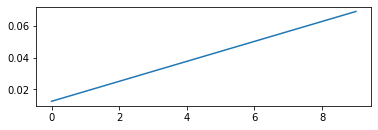

In [4]:
import matplotlib.pyplot as plt
plt.subplot (2,1,1)
plt.plot(x_20_data_sliding[2])


In [5]:
from sklearn.preprocessing import RobustScaler

scaler_20 = RobustScaler()
scaler_20_scaled = scaler_20.fit(x_20_data_sliding)
x_20_data_sliding_scaled= scaler_20_scaled.transform(x_20_data_sliding)

scaler_80 = RobustScaler()
scaler_80_scaled = scaler_80.fit(x_80_data_sliding)
x_80_data_sliding_scaled= scaler_80_scaled.transform(x_80_data_sliding)

scaler_150 = RobustScaler()
scaler_150_scaled = scaler_150.fit(x_150_data_sliding)
x_150_data_sliding_scaled= scaler_150_scaled.transform(x_150_data_sliding)

scaler_200 = RobustScaler()
scaler_200_scaled = scaler_200.fit(x_200_data_sliding)
x_200_data_sliding_scaled= scaler_200_scaled.transform(x_200_data_sliding)



In [6]:
from sklearn.preprocessing import OneHotEncoder

Label =[['Sine20'],['Sine80'],['Sine150'],['Sine200']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [7]:
x_20_data_sliding_scaled_concatenate = np.tile(Labelled[0][np.newaxis,:],(x_20_data_sliding_scaled.shape[0],1))
x_20_data_sliding_scaled_dataset=np.concatenate((x_20_data_sliding_scaled,x_20_data_sliding_scaled_concatenate),axis=1)

x_80_data_sliding_scaled_concatenate = np.tile(Labelled[1][np.newaxis,:],(x_80_data_sliding_scaled.shape[0],1))
x_80_data_sliding_scaled_dataset=np.concatenate((x_80_data_sliding_scaled,x_80_data_sliding_scaled_concatenate),axis=1)

x_150_data_sliding_scaled_concatenate = np.tile(Labelled[2][np.newaxis,:],(x_150_data_sliding_scaled.shape[0],1))
x_150_data_sliding_scaled_dataset=np.concatenate((x_150_data_sliding_scaled,x_150_data_sliding_scaled_concatenate),axis=1)


x_200_data_sliding_scaled_concatenate = np.tile(Labelled[3][np.newaxis,:],(x_200_data_sliding_scaled.shape[0],1))
x_200_data_sliding_scaled_dataset=np.concatenate((x_200_data_sliding_scaled,x_200_data_sliding_scaled_concatenate),axis=1)



In [8]:
stacked_data=np.vstack((x_20_data_sliding_scaled_dataset,x_80_data_sliding_scaled_dataset,x_150_data_sliding_scaled_dataset,x_200_data_sliding_scaled_dataset))

In [9]:
np.random.shuffle(stacked_data)

In [10]:
Test_data_index = int(0.1*stacked_data.shape[0])
Validate_data_index = int(0.2*stacked_data.shape[0])+Test_data_index

In [11]:
X_Test = stacked_data[0:Test_data_index,0:10]
Y_Test = stacked_data[0:Test_data_index,10:]

X_Validate= stacked_data[Test_data_index:Validate_data_index,0:10]
Y_Validate = stacked_data[Test_data_index:Validate_data_index,10:]

X_train= stacked_data[Validate_data_index:,0:10]
Y_train = stacked_data[Validate_data_index:,10:]

In [12]:
print(stacked_data.shape)
print(X_Test.shape)
print(X_Validate.shape)
print(X_train.shape)

(79960, 14)
(7996, 10)
(15992, 10)
(55972, 10)


In [13]:

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import preprocessing

model_4wave = keras.Sequential()
model_4wave.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128, input_shape=[X_train.shape[1], 1])))
model_4wave.add(keras.layers.Dropout(rate=0.5))
model_4wave.add(keras.layers.Dense(units=128, activation='relu'))
model_4wave.add(keras.layers.Dense(Y_train.shape[1], activation='softmax'))
model_4wave.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [14]:
X_train=X_train.reshape(55972,10,1)
X_Validate=X_Validate.reshape(15992,10,1)
X_Test = X_Test.reshape(7996,10,1)

In [15]:
history = model_4wave.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=10,
)

Epoch 1/100
5598/5598 [==============================] - 31s 6ms/step - loss: 1.2348 - acc: 0.3701
Epoch 2/100
5598/5598 [==============================] - 30s 5ms/step - loss: 0.5629 - acc: 0.7463
Epoch 3/100
5598/5598 [==============================] - 29s 5ms/step - loss: 0.4264 - acc: 0.8088
Epoch 4/100
5598/5598 [==============================] - 31s 6ms/step - loss: 0.3599 - acc: 0.8390
Epoch 5/100
5598/5598 [==============================] - 34s 6ms/step - loss: 0.3222 - acc: 0.8583
Epoch 6/100
5598/5598 [==============================] - 31s 6ms/step - loss: 0.2943 - acc: 0.8727
Epoch 7/100
5598/5598 [==============================] - 30s 5ms/step - loss: 0.2693 - acc: 0.8807
Epoch 8/100
5598/5598 [==============================] - 33s 6ms/step - loss: 0.2471 - acc: 0.8920
Epoch 9/100
5598/5598 [==============================] - 31s 5ms/step - loss: 0.2335 - acc: 0.8964
Epoch 10/100
5598/5598 [==============================] - 31s 6ms/step - loss: 0.2154 - acc: 0.9055
Epoch 11/

KeyboardInterrupt: 

In [ ]:
_ , accuracy = model_4wave.evaluate(X_Validate, Y_Validate)
print('Accuracy: %.2f' % (accuracy*100))